In [1]:
push!(LOAD_PATH,"../src/")
using UniversalDiffEq

┌ Warning: Error requiring `Enzyme` from `LinearSolve`
│   exception = (LoadError("/Users/johnbuckner/.julia/packages/LinearSolve/qCLK7/ext/LinearSolveEnzymeExt.jl", 1, ArgumentError("Package LinearSolve does not have Enzyme in its dependencies:\n- If you have LinearSolve checked out for development and have\n  added Enzyme as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with LinearSolve")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x000000010d920299, Ptr{Nothing} @0x000000010450bf50, Ptr{Nothing} @0x000000010453fbac, Ptr{Nothing} @0x000000010453e94f, Ptr{Nothing} @0x000000010453f165, Ptr{Nothing} @0x000000010453ed72, Ptr{Nothing} @0x0000000104540045, Ptr{Nothing} @0x0000000115059d9a, Ptr{Nothing} @0x000000010450bf50, Ptr{Nothing} @0x000000011511b8b5, Ptr{Nothing} @0x0000000114c89bb5, Ptr{Nothing} @0x000000010450bf50, Ptr{Nothing} @0x0000000104518d3a, Ptr{Nothing} @0x00000001

In [2]:
# set up neural network 
using Lux
dims_in = 2
hidden_units = 10
nonlinearity = tanh
dims_out = 1
NN = Lux.Chain(Lux.Dense(dims_in,hidden_units,nonlinearity),Lux.Dense(hidden_units,dims_out))

# initialize parameters 
using Random
rng = Random.default_rng() 
NNparameters, NNstates = Lux.setup(rng,NN) 

function derivs!(du,u,covariates,p,t)
    C, states = NN(u,p.NN, NNstates) # NNstates are
    du[1] = p.r*u[1] - C[1] + p.beta[1] * covariates[1]
    du[2] = p.theta*C[1] -p.m*u[2] + p.beta[2] * covariates[1]
end

function priors(p)
    L = 0.01 * (p.r - 4.0).^2
    L = 0.01 * (p.m - 5.0).^2
    L = 0.01 * (p.theta - 0.75).^2
end 

init_parameters = (NN = NNparameters,r = 1.0,m=0.5,theta=0.5, beta = [0,0])
nothing

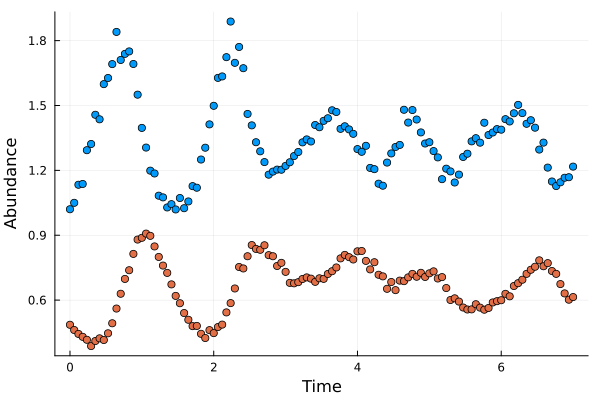

In [3]:
data,X,plt = LorenzLotkaVolterra(T = 7.0, datasize = 120)
plt

In [4]:
Ntest = 20
training_data = data[1:(end-20),:]
testing_data = data[(end-20):end,:]
training_data[1:4,:]

Row,t,x1,x2
,Float64,Float32,Float32
1,0.0,1.02021,0.485974
2,0.0588235,1.04996,0.461757
3,0.117647,1.13349,0.443685
4,0.176471,1.13714,0.430231


In [5]:
model = CustomDerivatives(training_data,X,derivs!,init_parameters,priors;proc_weight=2.0,obs_weight=0.5,reg_weight=10^-4)
nothing

In [6]:
gradient_decent!(model,verbose = true, maxiter = 200)

1.148 1.053 0.958 0.871 0.79 0.713 0.64 0.574 0.514 0.458 0.407 0.361 0.319 0.281 0.247 0.217 0.19 0.166 0.145 0.126 0.109 0.094 0.082 0.07 0.06 0.052 0.044 0.038 0.032 0.028 0.024 0.02 0.018 0.015 0.014 0.012 0.011 0.01 0.01 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.01 0.01 0.01 0.01 0.01 0.009 0.009 0.009 0.009 0.008 0.008 0.008 0.007 0.007 0.007 0.006 0.006 0.006 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.002 0.003 0.003 0.002

In [7]:
BFGS!(model)

ComponentVector{Float64}(uhat = [1.0217598578409968 1.0671806546671077 … 1.3801122491084585 1.3796514171641836; 0.4973542883217797 0.46085340120324964 … 0.5622614564805073 0.5673317810947948], process_model = (NN = (layer_1 = (weight = [-0.3799299895646797 -0.6930910868975503; 0.37993219333276346 0.6930957481443013; … ; 0.379923265483497 0.6930817300777085; 0.3799281804979497 0.6930894954157276], bias = [0.9993994007383511; -0.9994069035837092; … ; -0.9993896690943387; -0.9993962925037326;;]), layer_2 = (weight = [-0.7974411311022848 0.7974444376222543 … 0.7974307067246204 0.7974371536019919], bias = [3.7593625618694344;;])), r = 2.7507636352593368, m = 4.083305573348702, theta = 0.7686232969403233, beta = [0.05054220054183133, -0.0019085940423682966]), process_loss = Float64[], observation_model = Float64[], observation_loss = Float64[], process_regularization = Float64[], observation_regularization = Float64[])

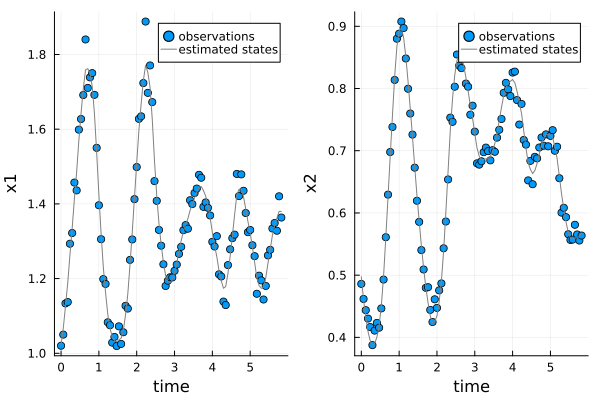

In [8]:
plot_state_estimates(model)

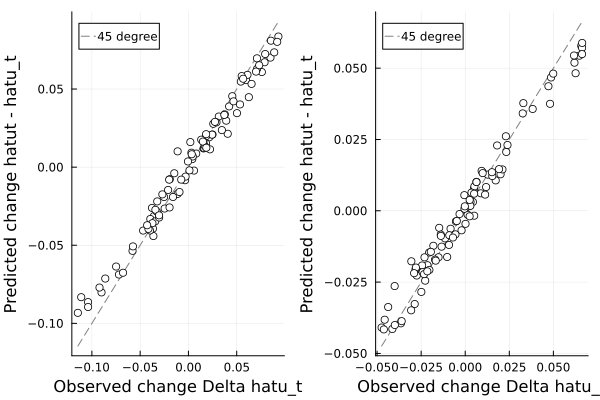

In [9]:
plot_predictions(model)

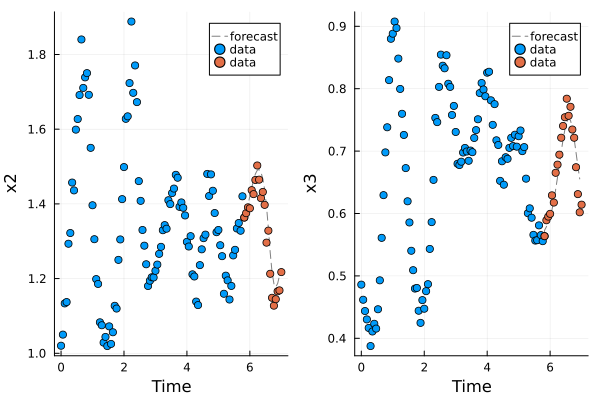

In [10]:
plt,(p1,p2) = plot_forecast(model, testing_data )
plt

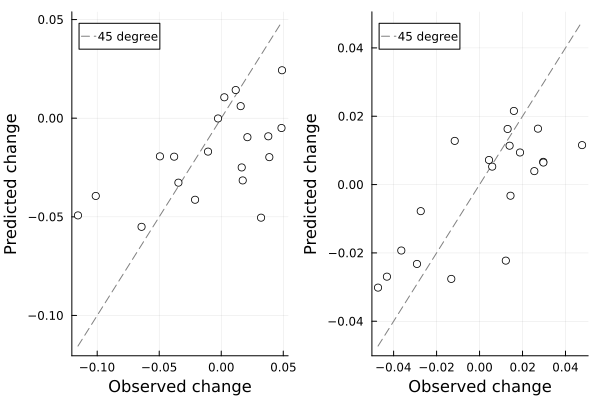

In [11]:
plot_predictions(model, testing_data)

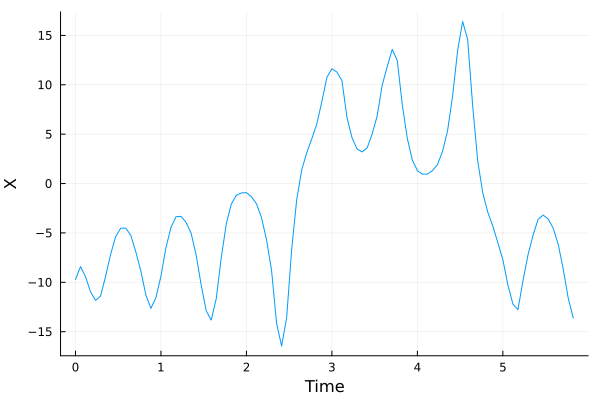

In [12]:
plot_covariates(model)

In [13]:
pars = UniversalDiffEq.get_parameters(model)
println("Growth rate: ", pars.r)
println("Mortaility rate: ", pars.m)
println("Conversion efficency: ", pars.theta)

Growth rate: 2.7507636352593368
Mortaility rate: 4.083305573348702
Conversion efficency: 0.7686232969403233
